<a href="https://colab.research.google.com/github/jeesperon/EjerciciosMNA/blob/main/Team17_Sem7_redneuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

* Esperón Carreón José Eduardo A01372413
* Fernández Lara Jorge A01793062
* Hernández Ramos Joel Orlando A00759664
* Romo Cárdenas Juan Carlos A00260430
* Torres Cantú David Alejandro A00818002


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:

# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PowerTransformer


import matplotlib.pyplot as plt

**Objetivo:** Predecir si una persona es clasificada como confiable a la asignación de un crédito, o no lo es tomando la base de datos históricos del South_German_Credit_Data_Set.

#**Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las  mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado. 

Para un manejo de los datos de forma directa, se descargó la base de datos y fue incluida en un repositorio público en "GitHub", de tal forma que cualquiera pueda acceder a él, sin necesidad de incorporar el archivo al directorio

In [ ]:
filename='https://raw.githubusercontent.com/JoelOrlandoHR/RANDOM/main/dataset_Facebook.csv'

Para obtener una primera percepción, creamos el dataframe y visualizamos las primeras 5 filas.



In [ ]:
df=pd.read_csv(filename, delimiter=';')
df.rename(columns={'Lifetime People who have liked your Page and engaged with your post': 'LPE'}, inplace=True)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Una vez que hemos visualizado que nuestro DataFrame fue creado de manera correcta, definimos las variables de entrada y las Variables de Salida. 

In [ ]:
X=df[['Post Hour', 'Paid', 'Post Month', 'Post Weekday', 'Type', 'Category', 'Page total likes']]
y=df[['LPE']] # se cambio a una variable

In [ ]:
#creamos este df en caso de que necesitemos un dataframe solamente con las columnas 7 columnas de entrada y las 3 de salida que usaremos en el ejercicio.
df_v2= df.copy()[['Post Hour', 'Paid', 'Post Month', 'Post Weekday', 'Type', 'Category', 'Page total likes', 'LPE']] #se cambio
df_v2.head()

,Post Hour,Paid,Post Month,Post Weekday,Type,Category,Page total likes,LPE
0,3,0.0,12,4,Photo,2,139441,119
1,10,0.0,12,3,Status,2,139441,1108
2,3,0.0,12,3,Photo,3,139441,132
3,10,1.0,12,2,Photo,2,139441,1386
4,3,0.0,12,2,Photo,2,139441,396


#**Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y 
validación.

Generamos el modelo conforme a lo especificado en las instrucciones, separando la variable resultado.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=5)
#Cabe destacar que 400 datos de entrenamiento corresponden al 80% de nuestra población.

#**Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que 
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el 
error porcentual absoluto medio MAPE. 

In [ ]:
def my_RMSE (y_real, y_pred):

  square_error=np.square(np.subtract(y_real,y_pred))
  mean_square=np.mean(square_error)
  result_rmse= np.sqrt(mean_square)

  return result_rmse

def my_MAE (y_real, y_pred):

  absolute_error= np.absolute(y_real-y_pred)
  result_mae=np.mean(absolute_error)
  
  return result_mae

def my_MAPE (y_real, y_pred):

  percentage_abs_error= np.absolute((y_real-y_pred)/y_real)
  result_mape= np.mean(percentage_abs_error)

  return result_mape

#**Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida.  Utiliza un Pipeline para evitar el filtrado de información. 

De acuerdo al artículo, las siete variables de entrada se definen de la siguiente manera:

1. 'Category': Variable de tipo Categórico. Puede asumir tres valores.

2. 'Page total likes': Variable númerica. 

3. 'Type': Variable categórica. Puede tomar 4 valores.

4. 'Post month': Es una variable de tiempo y fecha. Sin embargo, en nuestros datos podriamos considerarlo categorico pues solo puede tomar valores del 1 al 12 haciendo alucion a cada mes del año. 

5. 'Post hour': Es una variable de tiempo y fecha. Sin embargo, en nuestros datos podriamos considerarlo categorico pues solo puede tomar valores del 0 al 23 haciendo alucion a las horas del año. No hay minutos (o decimales).

6. 'Post weekday': Es una variable de tiempo y fecha. Sin embargo, en nuestros datos podriamos considerarlo categorico pues solo puede tomar valores del 1 al 7 haciendo alucion a las horas del año. 1 es Domingo y 7 Sábado. 

7. 'Paid': Variable Binaria que hacea referencia si se hubo pago a Facebook (si o no). 

Por otro lado, las variables de salida tienen las siguientes características.

1. 'Lifetime People who have liked a Page and engaged with a post': Esta variable es númerica. Debido a que se refiere al número de personas que le dieron like y click a la publicación podemos inferir que solamente son números enteros. 




##ANALIZANDO LOS DATOS ORIGINALES

Antes de resolver decidir si vamos a imputar y transformar nuestros datos haremos un breve análisis para visualizar las carácteristicas de nuestros datos. 

Comenzamos analizando nuestros datos para saber si hay datos nulos. 

In [ ]:
df_v2.isna().any()

Post Hour           False
Paid                 True
Post Month          False
Post Weekday        False
Type                False
Category            False
Page total likes    False
LPE                 False
dtype: bool

Con estos resultados nos podemos dar cuenta de que nuestro data set tiene dos variables con datos nulos: Like y Paid.
Haremos un análisis un poco más profundo para revisar el tipo de información que tenemos en cada variable.

In [ ]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Post Hour         500 non-null    int64  
 1   Paid              499 non-null    float64
 2   Post Month        500 non-null    int64  
 3   Post Weekday      500 non-null    int64  
 4   Type              500 non-null    object 
 5   Category          500 non-null    int64  
 6   Page total likes  500 non-null    int64  
 7   LPE               500 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 31.4+ KB


In [ ]:
df_v2['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

Volvemos a darnos cuenta de que tenemos datos nulos en esa variable y adicionalmente nos percatamos de que la variable Type es un string u objeto. Esto se tomará en cuenta más adelante a la hora de transformar.


Ahora continuaremos a dividir nuestras variables según el tipo que fue descrito en el artículo 

In [ ]:
Categorical_Variables= ['Category', 'Post Month', 'Post Hour','Post Weekday', 'Type']

X_Numerical_Variables= ['Page total likes']

Y_Numerical_Variables=['LPE'] #se cambio a una variable

Binary=['Paid']

Ahora es importante mencionar que en este momento de ejercicio no estamos haciendo distinción entre variables de entrada y salida pues le dimos prioridad a hacer el mismo tipo de imputaciones, escalaciones y transformaciones al tipo de variable. 

Primero analizaremos cada tipo de dato para comparar diferencias antes y después de las imputaciones y transformaciones.


1. **Variables Númericas**

In [ ]:
X_train_num=X_train[X_Numerical_Variables].copy()
Y_train_num=y_train[Y_Numerical_Variables].copy()

train_num = X_train_num
train_num[Y_Numerical_Variables]= y_train[Y_Numerical_Variables].copy()
train_num.describe()

,Page total likes,LPE
count,400.000000,400.000000
mean,123493.317500,613.715000
std,16094.977964,638.235403
min,81370.000000,9.000000
25%,113028.000000,286.000000
50%,129600.000000,403.000000
75%,136642.000000,671.500000
max,139441.000000,4376.000000


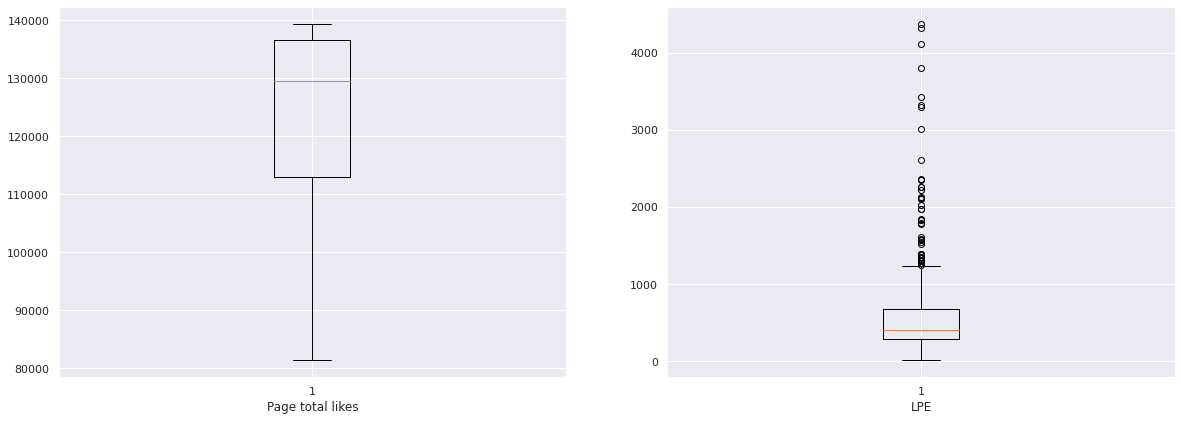

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})

figure_1, axes = plt.subplots(1, 2)
for i in range(0,2):
  plt.subplot(2, 2, (i+1))
  plt.boxplot(train_num[train_num.columns[i]])
  plt.xlabel(train_num.columns[i])
plt.show()

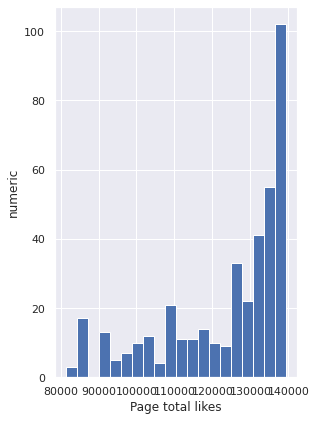

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
k=0
figure_1, axes = plt.subplots(1, 1)
for k in range(0,1):
  plt.subplot(2, 4, (k+1))
  Transf0 = X_train[X_Numerical_Variables].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(X_Numerical_Variables[k])
  if k==0:
    plt.ylabel('numeric')
plt.show()

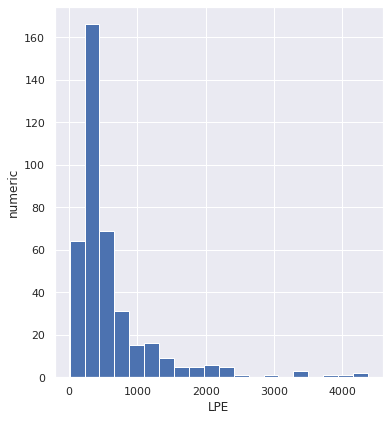

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
k=0
figure_1, axes = plt.subplots(1, 1)
for k in range(0,1):
  plt.subplot(2, 3, (k+1))
  Transf0 = y_train[Y_Numerical_Variables].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(Y_Numerical_Variables[k])
  if k==0:
    plt.ylabel('numeric')
plt.show()

2. **Variables Categóricas**

In [ ]:
X_train_cat=X_train[Categorical_Variables].copy()
X_train_cat.describe()

,Category,Post Month,Post Hour,Post Weekday
count,400.00000,400.000000,400.000000,400.00000
mean,1.89250,7.110000,7.812500,4.17250
std,0.85309,3.324987,4.383535,2.00194
min,1.00000,1.000000,1.000000,1.00000
25%,1.00000,4.000000,3.000000,2.00000
50%,2.00000,7.000000,9.000000,4.00000
75%,3.00000,10.000000,11.000000,6.00000
max,3.00000,12.000000,23.000000,7.00000


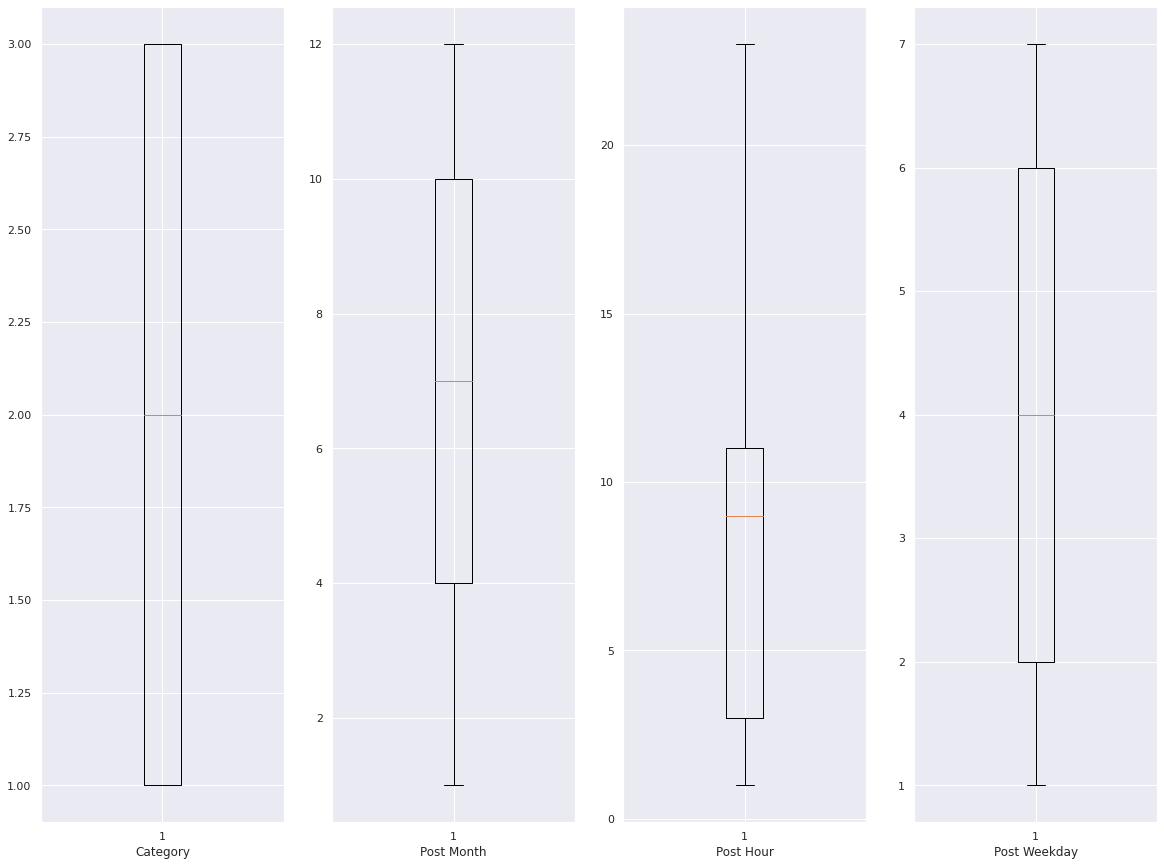

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})

figure_2, axes = plt.subplots(1, 4)
for i in range(0,4):
  plt.subplot(1, 4, (i+1))
  plt.boxplot(X_train_cat[X_train_cat.columns[i]])
  plt.xlabel(X_train_cat.columns[i])
plt.show()

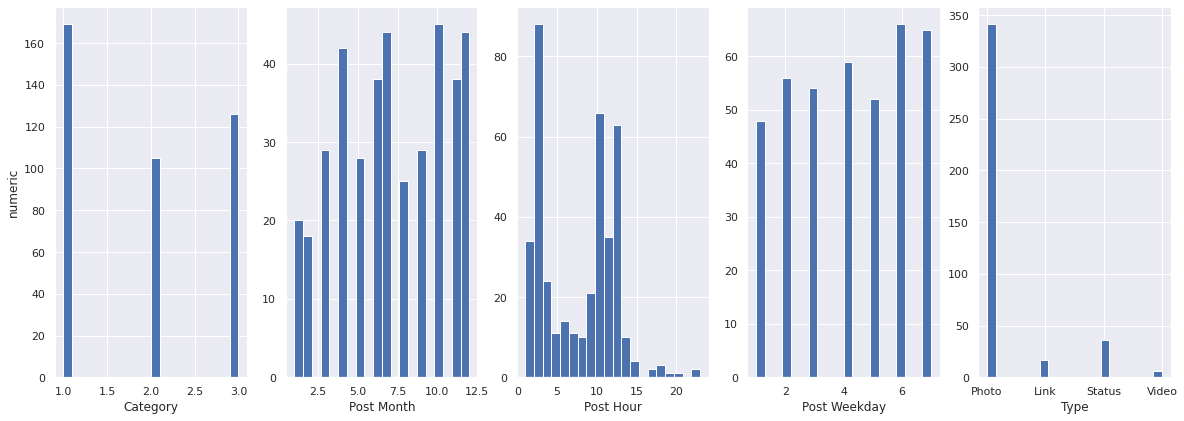

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
k=0
figure_1, axes = plt.subplots(1, 5)
for k in range(0,5):
  plt.subplot(2, 5, (k+1))
  Transf0 = X_train[Categorical_Variables].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(Categorical_Variables[k])
  if k==0:
    plt.ylabel('numeric')
plt.show()

 3. **Variables Binarias**

In [ ]:
X_train_bin=X_train[Binary].copy()
X_train_bin.describe()

,Paid
count,399.000000
mean,0.293233
std,0.455816
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


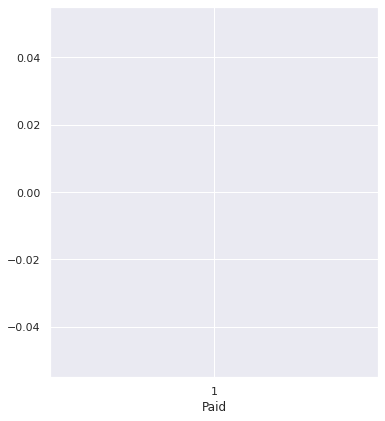

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})

figure_3, axes = plt.subplots(1, 1)
for i in range(0,1):
  plt.subplot(2, 3, (i+1))
  plt.boxplot(X_train_bin[X_train_bin.columns[i]])
  plt.xlabel(X_train_bin.columns[i])
plt.show()

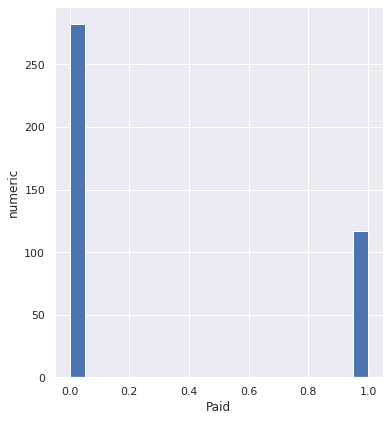

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
k=0
figure_1, axes = plt.subplots(1, 1)
for k in range(0,1):
  plt.subplot(2, 3, (k+1))
  Transf0 = X_train[Binary].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(Binary[k])
  if k==0:
    plt.ylabel('numeric')
plt.show()

##IMPUTACION Y TRANSFORMACIÓN

Después de analizar nuestros datos y su distribución podemos concluir que si necesitamos imputaciones para llenar los valores faltantes y transformaciones para mantener nuestros datos en una escala parecida. 


> **Valores numéricos:**



In [ ]:
#Transformación e imputación para valores Numéricos.
#Decidimos utilizar la imputación mediana y transformación MinMax.
num_pipeline =  Pipeline(steps = [('impMedian', SimpleImputer(strategy='median')),  
                                        ('scalar', MinMaxScaler(feature_range=(1,2))) ,
                                         ('box-cox',PowerTransformer(method='box-cox'))])  
num_pipeline_nombres = X_Numerical_Variables

> **Valores categóricos:**


In [ ]:
#Transformación e imputación para valores Categóricos.
#Decidimos utilizar el modo de imputación y Transformación de One Hot Encoding.
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(handle_unknown = "ignore"))])  
cat_pipeline_nombres = Categorical_Variables

> **Valores binarios:**

In [ ]:
#Transformación e imputación para valores Binarios.
#Decidimos utilizar el modo de imputación y Transformación de One Hot Encoding.
bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(handle_unknown = "ignore"))])
bin_pipeline_nombres = Binary

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catpipe', cat_pipeline, cat_pipeline_nombres),
                                                        ('binpipe', bin_pipeline, bin_pipeline_nombres)],
                                        remainder='passthrough')

In [ ]:
# Transformación para disminuir sesgo positivo:
def y_Transform(Y):
  #print("Transf(y)\n")  # Por si deseas ver cuándo se manda llamar esta función.
  Y_ = Y.copy() 
  Y_ = np.log(Y_)
  return Y_

# Inversa de la variable de salida que se usará para las predicciones:
def y_inverseTransform(Y):
  #print("invTransf(y)\n")
  Y_ = Y.copy() 
  Y_ = np.exp(Y_)
  return Y_

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de 
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para 
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y 
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la 
actividad. 

In [ ]:
#MODELO DUMMYREGRESSOR
from sklearn.dummy import DummyRegressor
dummy_xtrain, dummy_xval, dummy_ytrain, dummy_yval= train_test_split(X_train, y_train, train_size=0.75, random_state=3)
modeloDummy= DummyRegressor(strategy='median')

pipeline = Pipeline(steps=[('ct',columnasTransformer),('modelo',modeloDummy)])

modelo = TransformedTargetRegressor(regressor=pipeline, 
                                    func= y_Transform,     # transformación para ajuste del sesgo.
                                    inverse_func=y_inverseTransform    # Para regresar los valores "y" en la escala original.
                                    )


modelo.fit(dummy_xtrain,dummy_ytrain)

yhat= modelo.predict(dummy_xval)

print("RMSE with dummy Regression:", (my_RMSE(dummy_yval, yhat)))

print("MAE with dummy Regression:", (my_MAE(dummy_yval, yhat)))

print("MAPE with dummy Regression:", (my_MAPE(dummy_yval, yhat)))


RMSE with dummy Regression: LPE    656.274874
dtype: float64
MAE with dummy Regression: LPE    348.209988
dtype: float64
MAPE with dummy Regression: LPE    1.077118
dtype: float64


#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con 
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada 
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de 
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor 
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o 
subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de 
iteraciones para que todos los modelos converjan.   

A continuación definiremos nuestro ciclo FOR en donde se realizará el entrenamiento de los tres modelos. Cómo se especifica en las instrucciones se utlizan las funciones de las métricas definidas por nosotros, se define el Kfold y se imprimen los resultados tanto de nuestro modelo con los datos de entrenamiento y validación.

In [ ]:
models = [LogisticRegression(max_iter=3000),  RandomForestClassifier(), MLPRegressor(max_iter=20000)]
model_names = ["Regresión Lineal Múltiple", "Random Forest", "Perceptrón Multicapa"] 
results= list()

for i in range(len(models)):
        
        #
        pipeline = Pipeline(steps = [('ct', columnasTransformer), (model_names[i], models[i])])
        modelo= TransformedTargetRegressor(regressor= pipeline, func=y_Transform, inverse_func= y_inverseTransform)
        #
        metrics= {'RMSE':make_scorer(my_RMSE), 'MAPE':make_scorer(my_MAPE), 'MAE':make_scorer(my_MAE) }
        kfold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=10)
        scores = cross_validate(estimator=pipeline, X=X_train, y=np.ravel(y_train), scoring=metrics, cv=kfold)
    
        #El score de cada iteración es almacenado en la lista "scores"
        results.append(scores)
    

        #Imprimos el resultado para cada modelo


        print('VALIDATION METRIC SCORES\n'+'%s:\nmean RMSE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\n' % (model_names[i],
                                                                          np.mean(scores['test_RMSE']),
                                                                          np.std(scores['test_RMSE']),
                                                                          np.mean(scores['test_MAPE']), 
                                                                          np.std(scores['test_MAPE']),
                                                                          np.mean(scores['test_MAE']),
                                                                          np.std(scores['test_MAE']), 
                                                                          ))


VALIDATION METRIC SCORES
Regresión Lineal Múltiple:
mean RMSE: 657.525 (95.6832)
mean MAPE: 0.856 (0.3510)
mean MAE: 353.083 (47.6063)

VALIDATION METRIC SCORES
Random Forest:
mean RMSE: 671.855 (76.7784)
mean MAPE: 1.034 (0.3680)
mean MAE: 388.735 (42.1305)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


VALIDATION METRIC SCORES
Perceptrón Multicapa:
mean RMSE: 645.541 (84.2877)
mean MAPE: 1.305 (0.4924)
mean MAE: 426.996 (48.3895)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#**Ejercicio-7.**

7. Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones. 


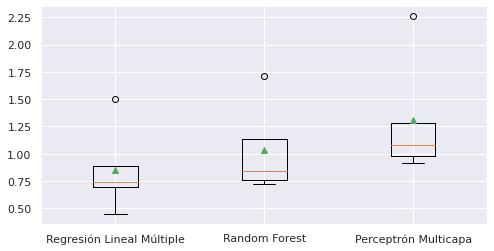

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
bpMAPE = list()
for i in range(len(results)):
  rr = results[i]['test_MAPE']
  bpMAPE.append(rr)

plt.boxplot(bpMAPE, labels=model_names, showmeans=True)
plt.show()


###**Fin de la Actividad de la semana 7.**